In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import copy
import random
import os
import gc

In [2]:
def set_seed(seed = 0):
    np.random.seed(seed)
    random_state = np.random.RandomState(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    return random_state

seed=912
random_state = set_seed(seed)

### create evaluation map of models and datasets

In [3]:
evaluation_map = dict()

evaluation_map['model_g_0_blend'] = ('../data/regression/pycaret_regression/G_class/g_t0_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_0.csv')
evaluation_map['model_g_1_blend'] = ('../data/regression/pycaret_regression/G_class/g_t1_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_1.csv')
evaluation_map['model_g_3_blend'] = ('../data/regression/pycaret_regression/G_class/g_t3_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_3.csv')
evaluation_map['model_g_4_blend'] = ('../data/regression/pycaret_regression/G_class/g_t4_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_4.csv')
evaluation_map['model_g_5_blend'] = ('../data/regression/pycaret_regression/G_class/g_t5_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_5.csv')
evaluation_map['model_g_6_blend'] = ('../data/regression/pycaret_regression/G_class/g_t6_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_6.csv')
evaluation_map['model_g_7_blend'] = ('../data/regression/pycaret_regression/G_class/g_t7_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_7.csv')
evaluation_map['model_g_8_blend'] = ('../data/regression/pycaret_regression/G_class/g_t8_result/blend_estimator', '../data/regression_training_data/G_class/emb_dl_8.csv')

evaluation_map['model_b0_0_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t0_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_0.csv')
evaluation_map['model_b0_1_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t1_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_1.csv')
evaluation_map['model_b0_2_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t2_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_2.csv')
evaluation_map['model_b0_3_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t3_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_3.csv')
evaluation_map['model_b0_4_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t4_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_4.csv')
evaluation_map['model_b0_5_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t5_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_5.csv')
evaluation_map['model_b0_6_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t6_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_6.csv')
evaluation_map['model_b0_7_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t7_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_7.csv')
evaluation_map['model_b0_8_blend'] = ('../data/regression/pycaret_regression/B0_class/b0_t8_result/blend_estimator', '../data/regression_training_data/B0_class/emb_dl_8.csv')

evaluation_map['model_b0_0_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t0_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_0.csv')
evaluation_map['model_b0_1_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t1_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_1.csv')
evaluation_map['model_b0_2_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t2_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_2.csv')
evaluation_map['model_b0_3_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t3_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_3.csv')
evaluation_map['model_b0_4_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t4_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_4.csv')
evaluation_map['model_b0_5_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t5_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_5.csv')
evaluation_map['model_b0_6_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t6_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_6.csv')
evaluation_map['model_b0_7_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t7_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_7.csv')
evaluation_map['model_b0_8_stack'] = ('../data/regression/pycaret_regression/B0_class/b0_t8_result/stack_estimator', '../data/regression_training_data/B0_class/emb_dl_8.csv')

evaluation_map['model_b1_0_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t0_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_0.csv')
evaluation_map['model_b1_1_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t1_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_1.csv')
evaluation_map['model_b1_2_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t2_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_2.csv')
evaluation_map['model_b1_3_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t3_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_3.csv')
evaluation_map['model_b1_4_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t4_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_4.csv')
evaluation_map['model_b1_5_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t5_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_5.csv')
evaluation_map['model_b1_6_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t6_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_6.csv')
evaluation_map['model_b1_7_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t7_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_7.csv')
evaluation_map['model_b1_8_blend'] = ('../data/regression/pycaret_regression/B1_class/b1_t8_result/blend_estimator', '../data/regression_training_data/B1_class/emb_dl_8.csv')

evaluation_map['model_b1_0_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t0_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_0.csv')
evaluation_map['model_b1_1_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t1_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_1.csv')
evaluation_map['model_b1_2_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t2_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_2.csv')
evaluation_map['model_b1_3_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t3_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_3.csv')
evaluation_map['model_b1_4_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t4_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_4.csv')
evaluation_map['model_b1_5_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t5_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_5.csv')
evaluation_map['model_b1_6_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t6_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_6.csv')
evaluation_map['model_b1_7_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t7_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_7.csv')
evaluation_map['model_b1_8_stack'] = ('../data/regression/pycaret_regression/B1_class/b1_t8_result/stack_estimator', '../data/regression_training_data/B1_class/emb_dl_8.csv')

### Evaluation loop

In [4]:
def get_test_data(df):
    train, test = train_test_split(df, test_size=0.30, random_state=random_state)
    X_test = copy.deepcopy(test)
    X_test.drop(columns=['labels'], axis=1, inplace=True)
    y_test = copy.deepcopy(test['labels'])
    return (X_test, y_test)

def get_rmse(model, df):
    X_test, y_test = get_test_data(df)
    y_pred = predict_model(estimator=model, data=X_test)
    rmse = mean_squared_error(y_test, y_pred.Label.values, squared=False)
    return rmse

def get_n_scores_as_df(model_dataset_map, n):
    return_map = dict()
    for k, v in tqdm(model_dataset_map.items(), total=len(model_dataset_map)):
        model = load_model(v[0])
        df = pd.read_csv(v[1], low_memory=False)
        scores = list()
        for i in range(n):
            scores.append(get_rmse(model, df))
        return_map[k] = scores
    gc.collect()
    return pd.DataFrame(return_map)

In [5]:
results_df = get_n_scores_as_df(evaluation_map, 100)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

### From the below diagrams models 0-1-5-6-8 are clear winners

Text(0.5, 0, 'Model RMSE')

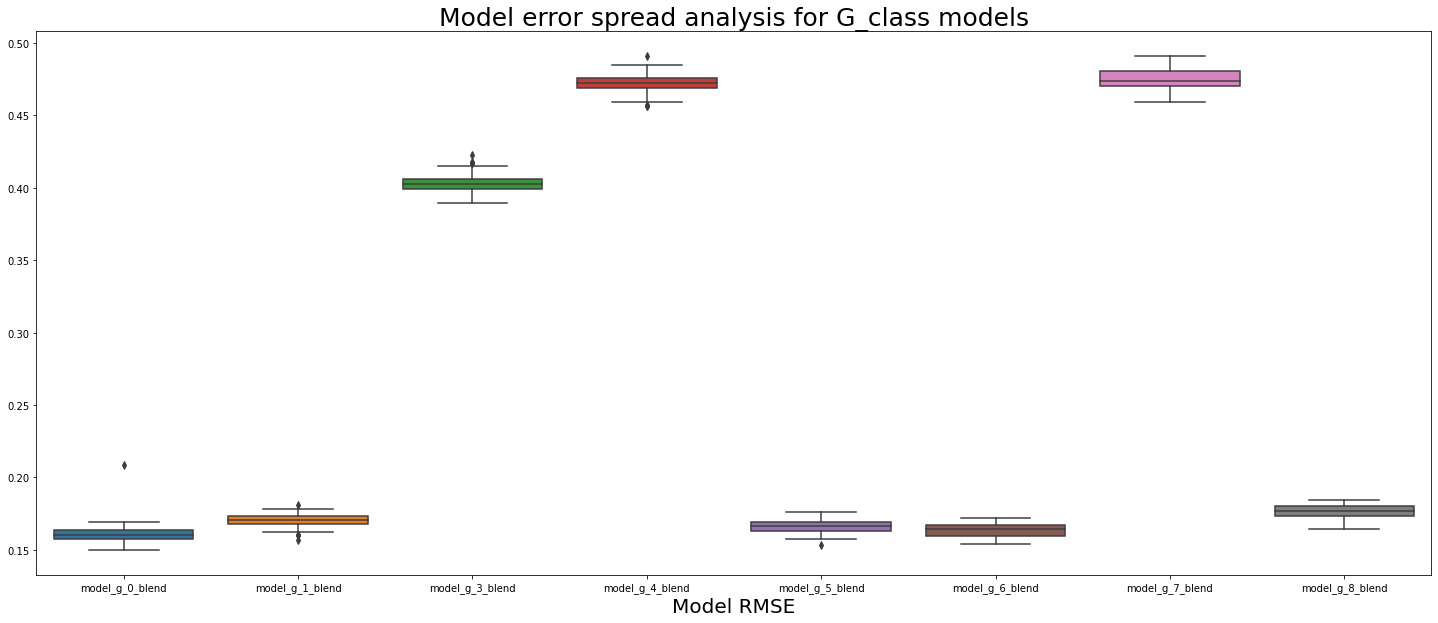

In [27]:
plt.figure(figsize = (25, 10))
sns.boxplot(data=results_df.iloc[:, 0:8])
title = "Model error spread analysis for G_class models"
plt.title(title, size=25)
plt.xlabel("Model RMSE", size=20)

Text(0.5, 0, 'Model RMSE')

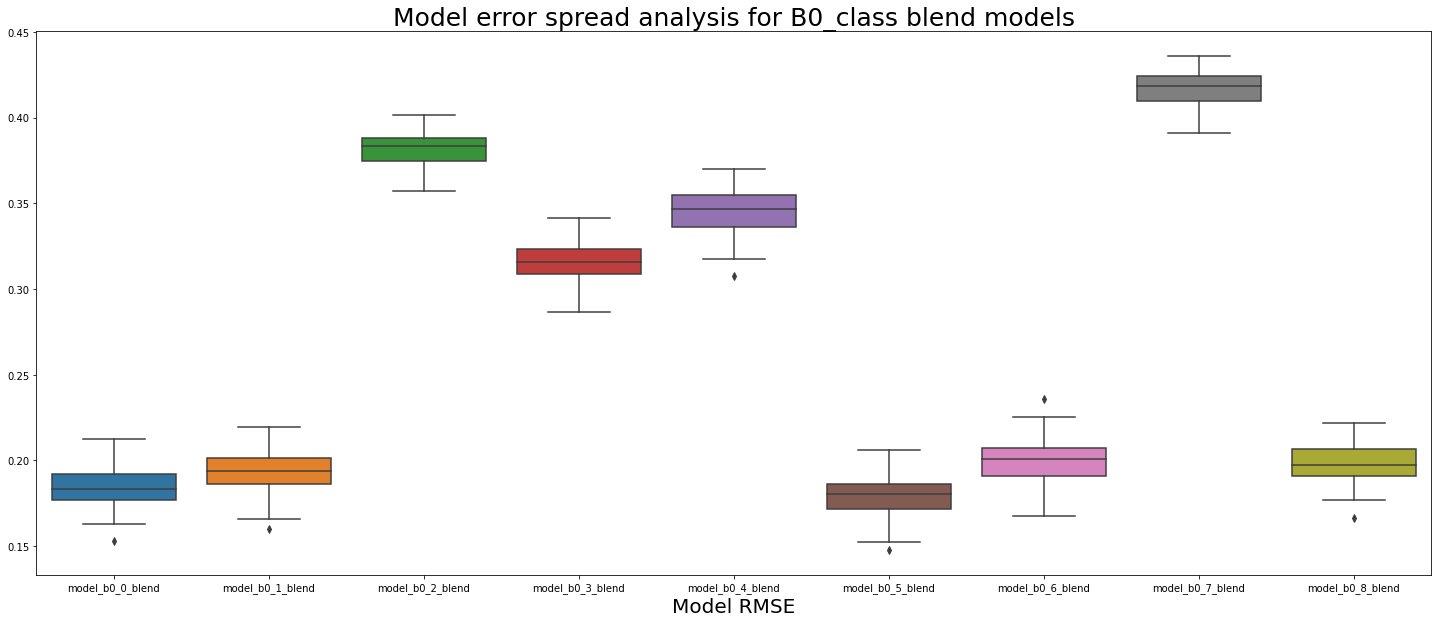

In [28]:
plt.figure(figsize = (25, 10))
sns.boxplot(data=results_df.iloc[:, 8:17])
title = "Model error spread analysis for B0_class blend models"
plt.title(title, size=25)
plt.xlabel("Model RMSE", size=20)

Text(0.5, 0, 'Model RMSE')

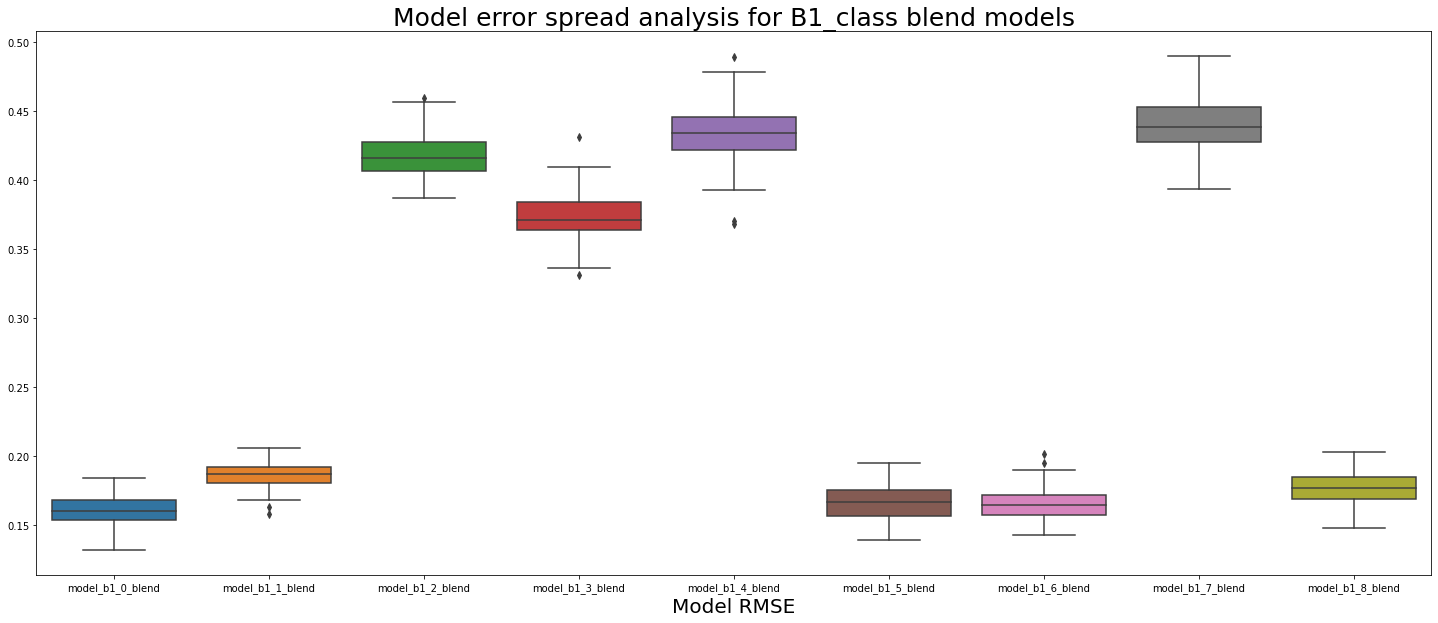

In [29]:
plt.figure(figsize = (25, 10))
sns.boxplot(data=results_df.iloc[:, 26:35])
title = "Model error spread analysis for B1_class blend models"
plt.title(title, size=25)
plt.xlabel("Model RMSE", size=20)

### blend VS stack pairwise comparision

Text(0.5, 0, 'Model RMSE')

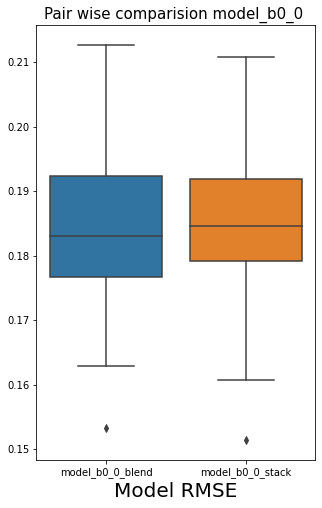

In [31]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b0_0_blend', 'model_b0_0_stack']])
title = "Pair wise comparision model_b0_0 "
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select stack for model_b0_0

Text(0.5, 0, 'Model RMSE')

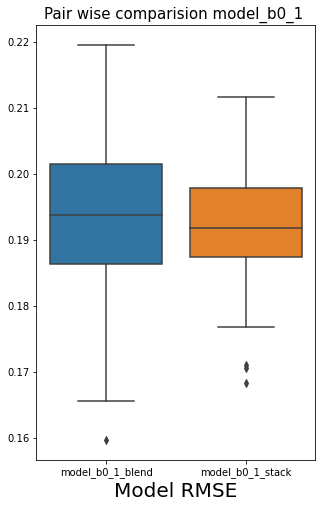

In [32]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b0_1_blend', 'model_b0_1_stack']])
title = "Pair wise comparision model_b0_1 "
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select stack for model_b0_1

Text(0.5, 0, 'Model RMSE')

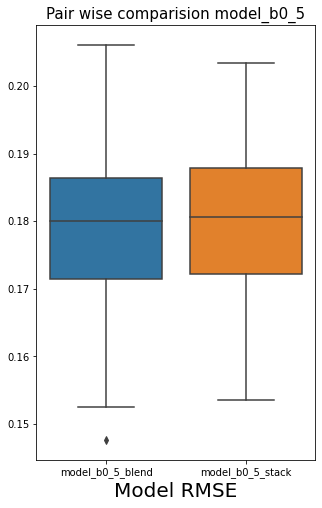

In [34]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b0_5_blend', 'model_b0_5_stack']])
title = "Pair wise comparision model_b0_5"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select stack for model_b0_5

Text(0.5, 0, 'Model RMSE')

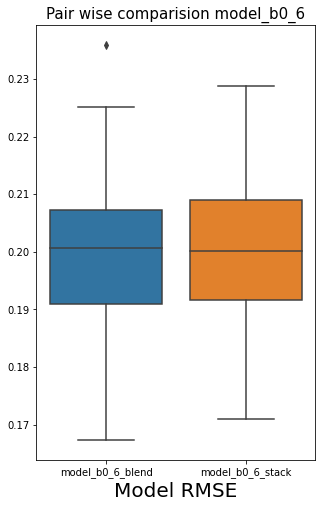

In [35]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b0_6_blend', 'model_b0_6_stack']])
title = "Pair wise comparision model_b0_6"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select blend for model_b0_6

Text(0.5, 0, 'Model RMSE')

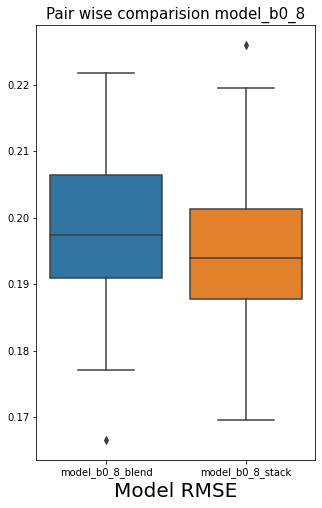

In [36]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b0_8_blend', 'model_b0_8_stack']])
title = "Pair wise comparision model_b0_8"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select stack for model_b0_8

Text(0.5, 0, 'Model RMSE')

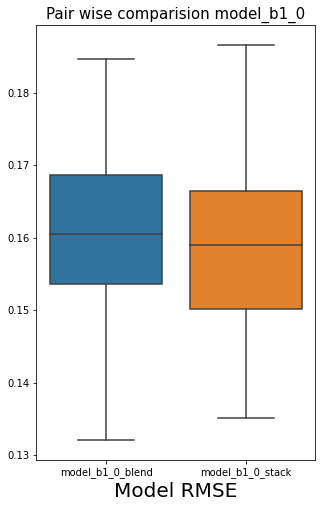

In [37]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b1_0_blend', 'model_b1_0_stack']])
title = "Pair wise comparision model_b1_0"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select blend for model_b1_0

Text(0.5, 0, 'Model RMSE')

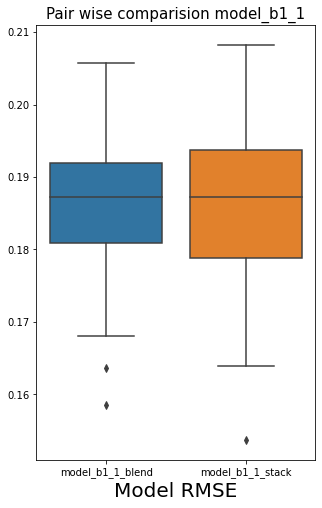

In [38]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b1_1_blend', 'model_b1_1_stack']])
title = "Pair wise comparision model_b1_1"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select blend for model_b1_1

Text(0.5, 0, 'Model RMSE')

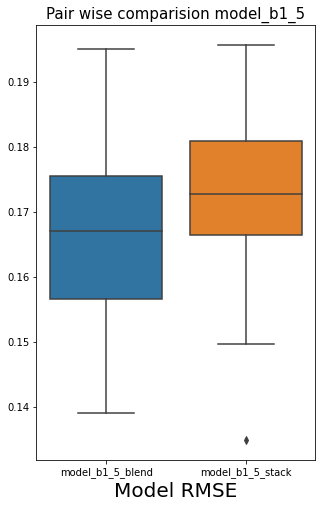

In [39]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b1_5_blend', 'model_b1_5_stack']])
title = "Pair wise comparision model_b1_5"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select blend for model_b1_5

Text(0.5, 0, 'Model RMSE')

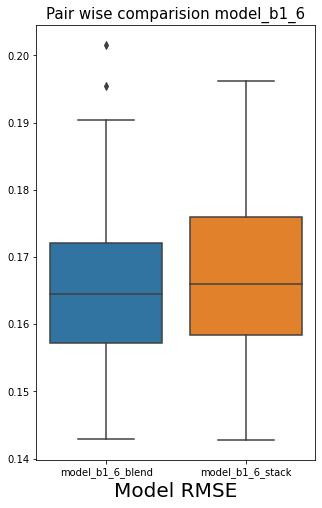

In [40]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b1_6_blend', 'model_b1_6_stack']])
title = "Pair wise comparision model_b1_6"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select blend for model_b1_6

Text(0.5, 0, 'Model RMSE')

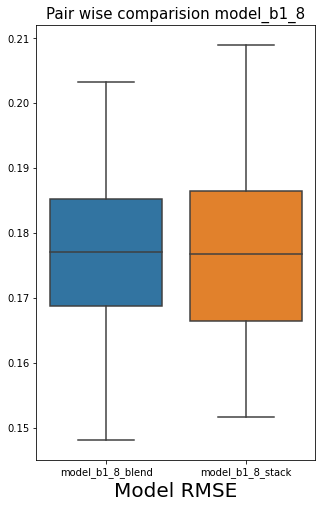

In [41]:
plt.figure(figsize = (5, 8))
sns.boxplot(data=results_df[['model_b1_8_blend', 'model_b1_8_stack']])
title = "Pair wise comparision model_b1_8"
plt.title(title, size=15)
plt.xlabel("Model RMSE", size=20)

### select blend for model_b1_8

# Output

### G_class: 0, 1, 5, 6 and 8

### B0_class: 0_stack, 1_stack, 5_stack, 6_blend and 8_stack

### B1_class: 0_blend, 1_blend, 5_blend, 6_blend and 8_blend 